In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [ ]:
data = pd.read_csv('qw.csv', index_col=0)

In [ ]:
Y_Res = data['Result']
Temp = data['Temp']
X = data.iloc[:, :-2]

In [ ]:
def my_f(degree, illustr=True):
  '''Подсчитываем коэффициент корреляции Пирсона для выявления линейных зависимостей, влияние Temp на данные'''
    col = X.columns
    if  illustr:
        fig, axs = plt.subplots(6, 3, figsize = (15, 20), constrained_layout=True, sharex=True, sharey=True)
        corr_matrix = np.corrcoef(data.T)
        sm.graphics.plot_corr_grid([corr_matrix]*2, xnames=data.columns)
    pears_d = {}
    for i in range(6):
        for j in range(3):
            cov = np.cov(X[col[0]], Temp**degree)
            pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
            pears_d[col[0]] = pearson
            
            if illustr:
                axs[i,j].scatter(Temp**degree, X[col[0]])
                axs[i,j].set_title('Temp^{}-{}. Pearson: {}'.format(degree, col[0], pearson))
                axs[i,j].set_ylabel('{}'.format(col[0]))

            col = col[1:]
    return pears_d

def otbor(level, pears_D):
  '''Отбираем переменные в которых значение коэффициента выше порога - level.
  Pears_D - словарь значений коэффициента из предыдущей функции'''
    for i in pears_D.keys():
        if abs(pears_D[i]) >= level:
            print(i, pears_D[i])


def mse(predict):
  '''Подсчет среднеквадратической ошибки'''
  return sum((predict - Y_Res)**2) / X.shape[0]


def my_f_1(degree):
  '''Подсчет коэффициента Пирсона для выявления зависимости целевой переменной Result от температуры. 
  degree - в какую степень  возводятся переменные температуры.'''
    col = X.columns
    pears_d = {}
    for i in col:
      cov = np.cov(X[i]**degree, Y_Res)
      pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
      pears_d[i] = pearson
    return pears_d

In [293]:
deg_1 = my_f(1, False)

In [294]:
deg_1

{'0ик': -0.04999945140881816,
 '0ртм': -0.07733666005547783,
 '1ик': -0.030973184675850057,
 '1ртм': -0.013474367652918966,
 '2ик': -0.06287025862178539,
 '2ртм': -0.07127171831497905,
 '3ик': -0.05953619294988927,
 '3ртм': 0.0007156693198018939,
 '4ик': -0.06704816624720762,
 '4ртм': -0.07207278613100483,
 '5ик': -0.018688962799082446,
 '5ртм': -0.019934641562606402,
 '6ик': 0.0031191665702678594,
 '6ртм': 0.0071491218820337234,
 '7ик': -0.012100044552248916,
 '7ртм': 0.010605576299176198,
 '8ик': 0.011809038312569372,
 '8ртм': 0.009771296212256624}

In [ ]:
print('Пирсон для столбца Result')
my_f_1(1)

Пирсон для столбца Result


{'0ик': 0.14730471336572737,
 '0ртм': 0.1271522633676699,
 '1ик': 0.16667120230302415,
 '1ртм': 0.19923889743318585,
 '2ик': 0.15785508498033365,
 '2ртм': 0.16667870780060878,
 '3ик': 0.15723901166038415,
 '3ртм': 0.17816303064671282,
 '4ик': 0.1111714975997663,
 '4ртм': 0.173744071537162,
 '5ик': 0.11893563610263853,
 '5ртм': 0.15192257485528346,
 '6ик': 0.10026780571908898,
 '6ртм': 0.1323067874448474,
 '7ик': 0.08891709185051021,
 '7ртм': 0.1277694555485553,
 '8ик': 0.1729533366525807,
 '8ртм': 0.20351577786554412}

In [295]:
otbor(0.05, deg_1)

0ртм -0.07733666005547783
2ртм -0.07127171831497905
4ртм -0.07207278613100483
2ик -0.06287025862178539
3ик -0.05953619294988927
4ик -0.06704816624720762


In [ ]:
# Интерпретация коэффициента корреляции производится исходя из уровня силы связи:
# r>0,01≤0,29 – слабая положительная связь,
# r>0,30≤0,69 – умеренная положительная связь,
# r>0,70≤1,00 – сильная положительная связь,
# r>-0,01≤-0,29 – слабая отрицательная связь,
# r>-0,30≤-0,69 – умеренная отрицательная связь,
# r>-0,70≤-1,00 – сильная отрицательная связь. 

# Линейные зависимости в нашем случае очень слабые, в основном отрицательные

In [296]:
# Загружаем данные в простую МНК модель. Х можно возвести в степень DEGREE необходимую для анализа.
DEGREE = 2
results = sm.OLS(Y_Res, X**DEGREE).fit()

In [297]:
# Результаты для первой модели
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Result   R-squared (uncentered):                   0.699
Model:                            OLS   Adj. R-squared (uncentered):              0.675
Method:                 Least Squares   F-statistic:                              28.53
Date:                Tue, 18 Aug 2020   Prob (F-statistic):                    1.02e-47
Time:                        14:08:05   Log-Likelihood:                         -146.89
No. Observations:                 239   AIC:                                      329.8
Df Residuals:                     221   BIC:                                      392.4
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0ртм          -0.0022      0.001     -2.107      0.036      -0.004      -0.000
1ртм           0.0022      0.001      1.557      0.121      -0.001       0.005
2ртм          -0.0022      0.002     -1.275      0.204      -0.006       0.001
3ртм           0.0005      0.002      0.316      0.752      -0.003       0.004
4ртм           0.0011      0.001      1.200      0.231      -0.001       0.003
5ртм           0.0009      0.002      0.582      0.561      -0.002       0.004
6ртм          -0.0005      0.002     -0.272      0.786      -0.004       0.003
7ртм          -0.0014      0.002     -0.874      0.383      -0.005       0.002
8ртм           0.0015      0.001      1.155      0.249      -0.001       0.004
0ик            0.0017      0.001      1.787      0.075      -0.000       0.004
1ик           -0.0007      0.001     -0.670      0.504      -0.003       0.001
2ик            0.0013      0.001      0.932      0.352      -0.001       0.004
3ик            0.0005      0.001      0.393      0.695      -0.002       0.003
4ик           -0.0011      0.001     -1.137      0.257      -0.003       0.001
5ик           -0.0004      0.001     -0.289      0.773      -0.003       0.002
6ик           -0.0003      0.001     -0.208      0.835      -0.003       0.002
7ик           -0.0009      0.001     -0.854      0.394      -0.003       0.001
8ик            0.0008      0.001      0.886      0.377      -0.001       0.003
==============================================================================
Omnibus:                      335.023   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.521
Skew:                          -0.565   Prob(JB):                     2.36e-07
Kurtosis:                       1.663   Cond. No.                         387.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No Skill: ROC AUC=0.500
OLS: ROC AUC=0.651


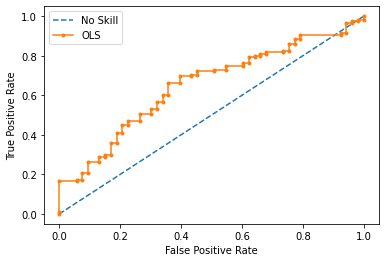

In [ ]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X**DEGREE, Y_Res, test_size=0.7, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = sm.OLS(trainy, trainX).fit()
# predict probabilities
lr_probs = model.predict(testX) / max(model.predict(testX))

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('OLS: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='OLS')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [290]:
preds = model.predict(testX)
OLS_mse = sum((preds - testy)**2) / testX.shape[0]
OLS_mse

0.22078625625412598

In [ ]:
# Логистическая регрессия

In [ ]:
logreg = LogisticRegression(C = 3, random_state = 0, max_iter=1000).fit(X, Y_Res)

In [ ]:
logreg.coef_

array([[-0.69584969,  0.67126722, -0.52873446,  0.09356743,  0.40555794,
         0.47731899, -0.08741214, -0.628353  ,  0.58646611,  0.57911798,
        -0.20617611,  0.31465514,  0.20890776, -0.2724301 , -0.2341743 ,
        -0.15175454, -0.33732654,  0.26391557]])

In [ ]:
l_preds = logreg.predict_proba(X).T[1]

In [291]:
def optim(X, step, l_pred):
  '''Для определения оптимального порога вероятности. '''
  POROG = 0
  opt_list = np.array([[0, 0]])
  while POROG <= 1:
    l_pr = [i for i in range(X.shape[0])]
    for i, item in enumerate(l_pred):
      if item >= POROG:
        l_pr[i] = 1
      else:
        l_pr[i] = 0

    opt_list = np.append(opt_list, [[POROG, mse(l_pr)]], axis=0)
    POROG+=step
  plt.plot(opt_list.T[0], opt_list.T[1])
  return opt_list

array([[0.        , 0.        ],
       [0.        , 0.33472803],
       [0.1       , 0.33472803],
       [0.2       , 0.33472803],
       [0.3       , 0.33472803],
       [0.4       , 0.33472803],
       [0.5       , 0.30962343],
       [0.6       , 0.32217573],
       [0.7       , 0.38075314],
       [0.8       , 0.49372385],
       [0.9       , 0.61506276],
       [1.        , 0.66527197]])

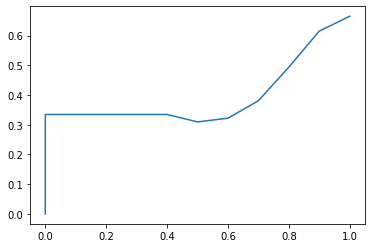

In [292]:
optim(X, 0.1, l_preds)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.622


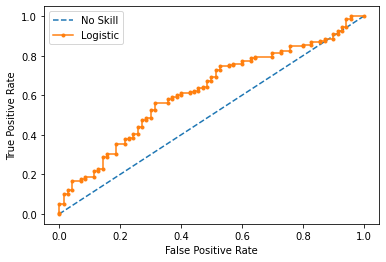

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, Y_Res, test_size=0.9, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(C = 1, solver='lbfgs', random_state=0, max_iter=1000)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Пробуем деревья

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.3969768	total: 14ms	remaining: 14s
1:	learn: 0.1487741	total: 20.6ms	remaining: 10.3s
2:	learn: 0.0614152	total: 26.8ms	remaining: 8.91s
3:	learn: 0.0327916	total: 33.1ms	remaining: 8.24s
4:	learn: 0.0264001	total: 39.4ms	remaining: 7.83s
5:	learn: 0.0220104	total: 45.6ms	remaining: 7.55s
6:	learn: 0.0155511	total: 51.8ms	remaining: 7.35s
7:	learn: 0.0134203	total: 58ms	remaining: 7.2s
8:	learn: 0.0116190	total: 64.2ms	remaining: 7.07s
9:	learn: 0.0098926	total: 70.3ms	remaining: 6.96s
10:	learn: 0.0092191	total: 76.4ms	remaining: 6.87s
11:	learn: 0.0083754	total: 82.5ms	remaining: 6.79s
12:	learn: 0.0078981	total: 88.7ms	remaining: 6.74s
13:	learn: 0.0067115	total: 94.9ms	remaining: 6.68s
14:	learn: 0.0062407	total: 101ms	remaining: 6.65s
15:	learn: 0.0057738	total: 108ms	remaining: 6.61s
16:	learn: 0.0053186	total: 114ms	remaining: 6.57s
17:	learn: 0.0051106	total: 120ms	remaining: 6.54s
18:	learn: 0.0047099	total: 126ms	remaining: 6.53s
19:	learn: 0.0044209	total: 133ms	

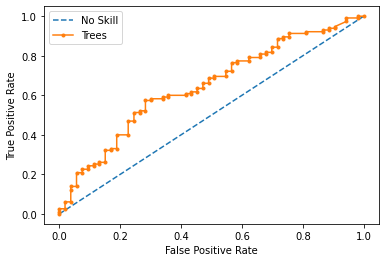

In [298]:

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, Y_Res, test_size=0.7, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = CatBoostClassifier(iterations= 1000, learning_rate=2, depth=10)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Trees: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Trees')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()